## Importing required libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Boston House data set
data=pd.read_csv("boston.csv")
data.shape

(506, 14)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#checking for null values in the data
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#checking for duplicates in the data
data.duplicated().sum()

0

In [7]:
#statistical summary
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

## Visualising Data

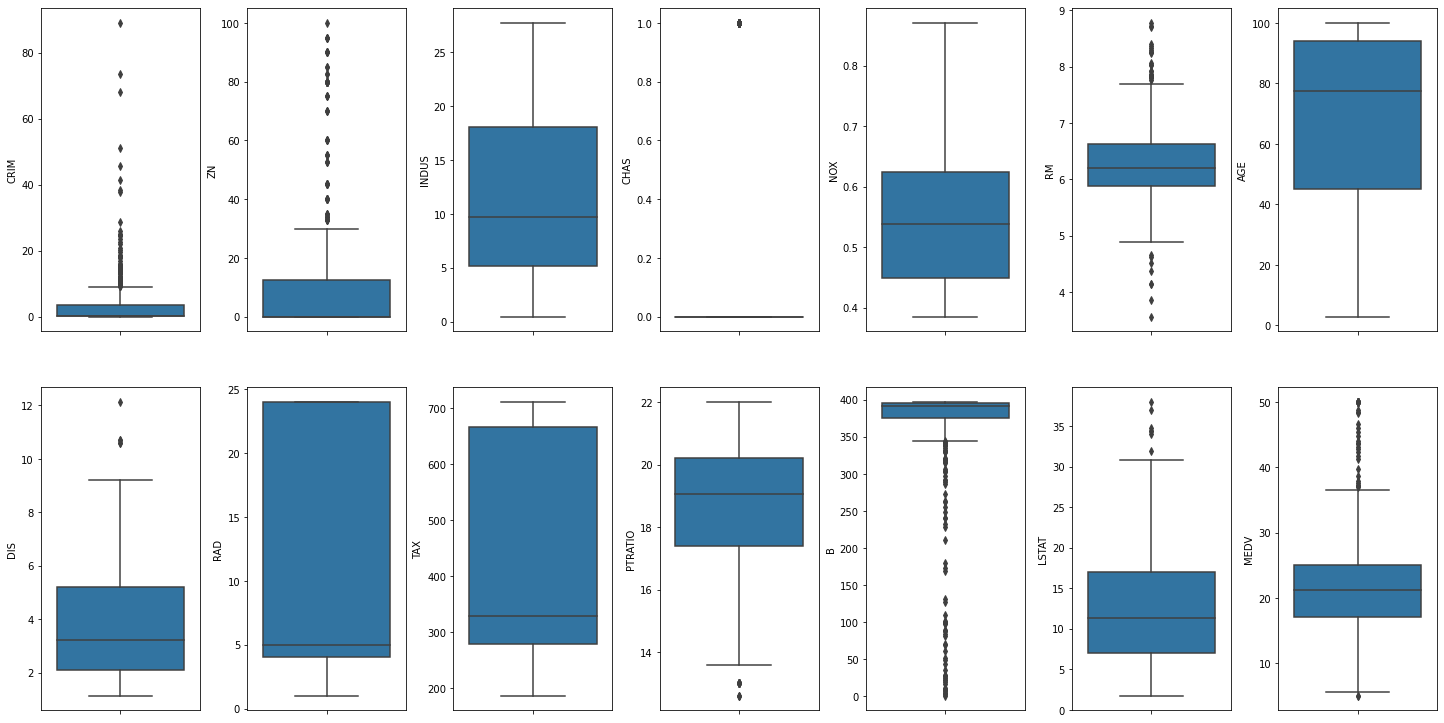

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col,value in data.items():
    sns.boxplot(y=col, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

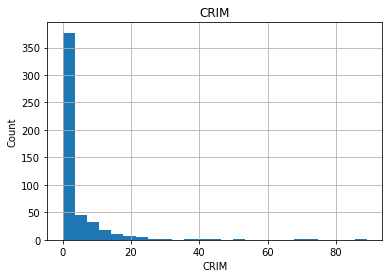

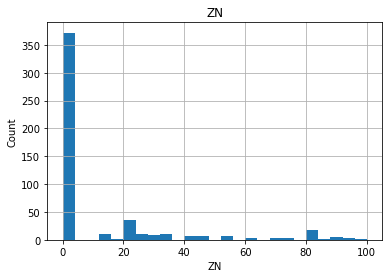

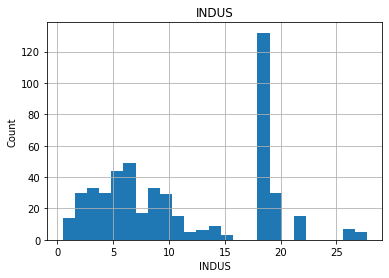

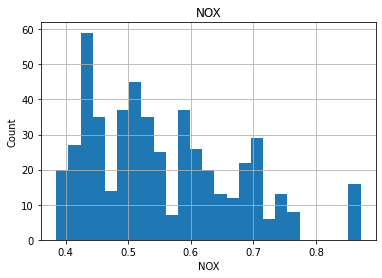

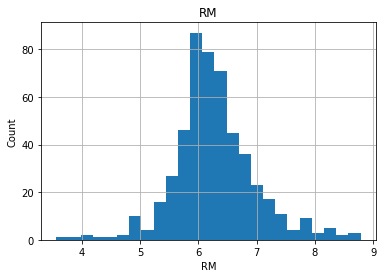

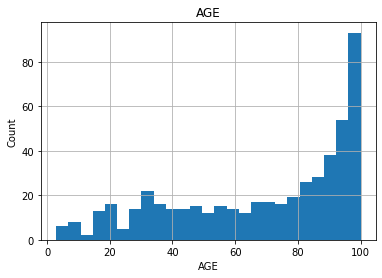

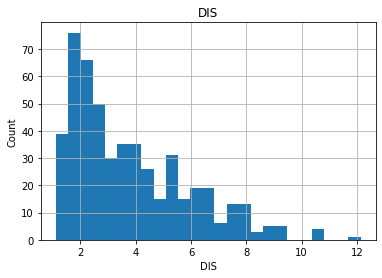

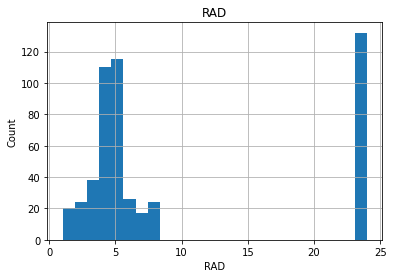

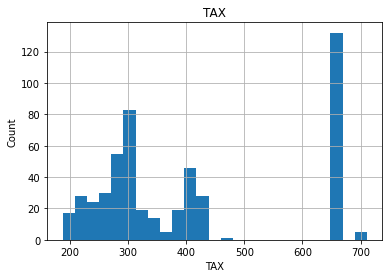

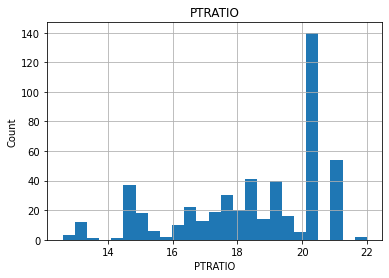

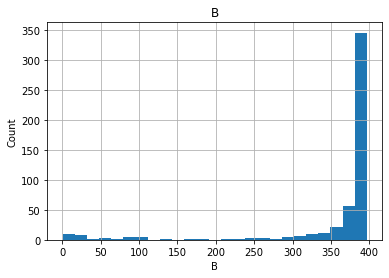

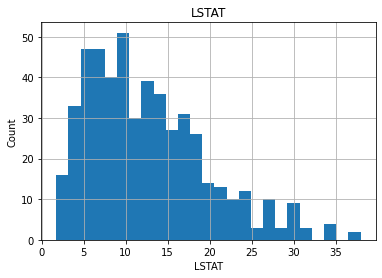

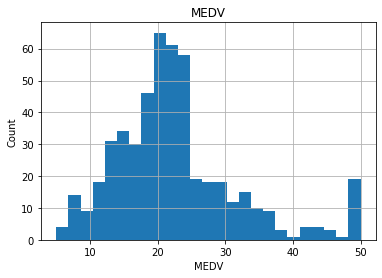

In [11]:
features=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
for feature in features:
    data1=data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [12]:
data=data[~(data['MEDV']>=50.0)]#MEDV has censored values at 50.00
print(np.shape(data))

(490, 14)


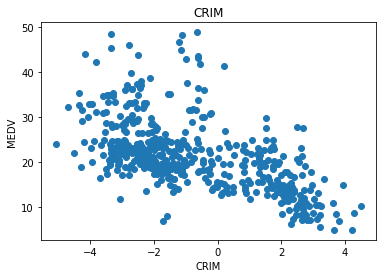

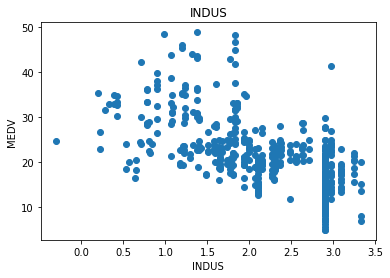

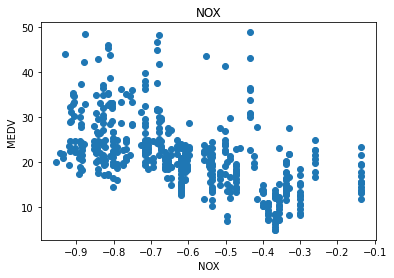

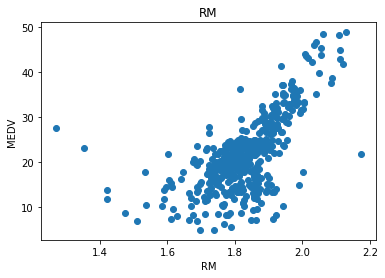

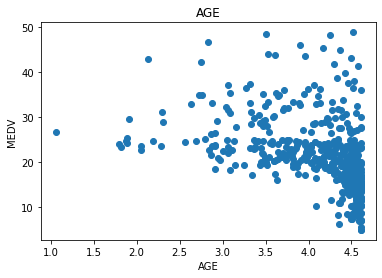

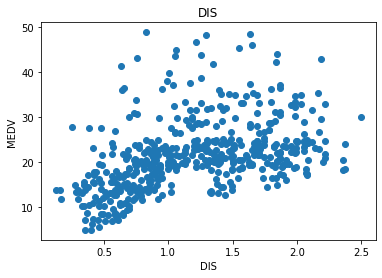

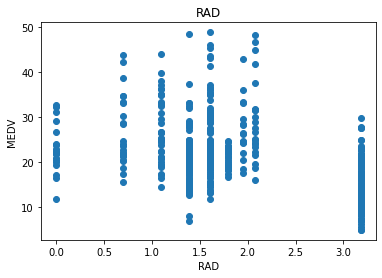

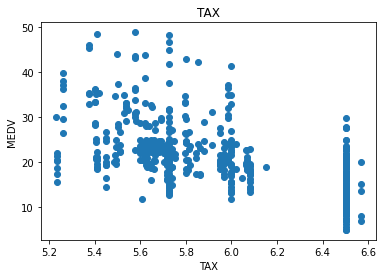

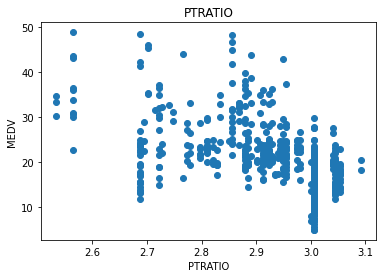

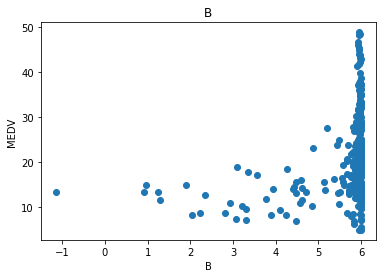

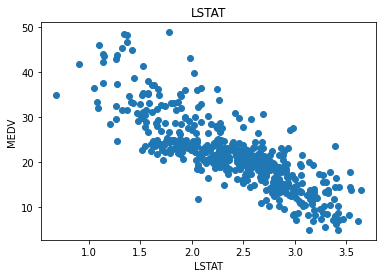

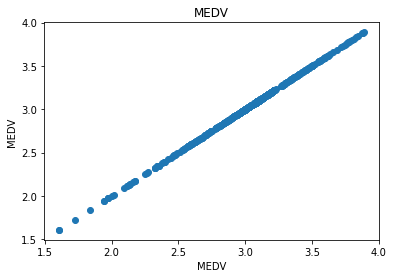

In [13]:
for feature in features:
    data1=data.copy()
    if 0 in data1[feature].unique():
        pass
    else:
        data1[feature]=np.log(data1[feature])
        plt.scatter(data1[feature],data1['MEDV'])
        plt.xlabel(feature)
        plt.ylabel('MEDV')
        plt.title(feature)
        plt.show()

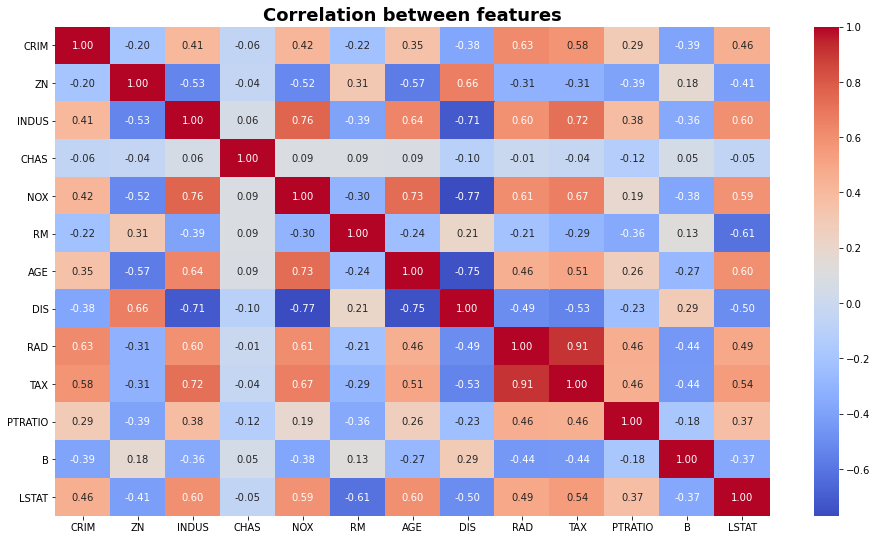

In [14]:
#correlation heatmap
plt.figure(figsize=(16,9))
sns.heatmap(x.corr(),cmap='coolwarm',fmt='.2f',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

In [15]:
#Function to remove highly correlated features
def correlation(data,threshold):
    corr_col=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

In [16]:
corr_features=correlation(x,0.9)
len(set(corr_features))

1

In [17]:
corr_features

{'TAX'}

In [18]:
x=x.drop(corr_features,axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33


In [19]:
#Univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures=SelectKBest(score_func=f_regression,k=10)
fit=bestfeatures.fit(x,y)
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(x.columns)

feature_scores=pd.concat([datascores,datacolumns],axis=1)
feature_scores.columns=['Score','Features']
#feature_scores_desc=feature_scores.sort_values('Score')
print(feature_scores.nlargest(8,'Score'))

         Score Features
11  601.617871    LSTAT
5   471.846740       RM
9   175.105543  PTRATIO
2   153.954883    INDUS
4   112.591480      NOX
0    89.486115     CRIM
8    85.914278      RAD
6    83.477459      AGE


In [20]:
x=x.drop(['CRIM','DIS','CHAS','DIS','B'],axis=1)
x.head()

,ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO,LSTAT
0,18.0,2.31,0.538,6.575,65.2,1,15.3,4.98
1,0.0,7.07,0.469,6.421,78.9,2,17.8,9.14
2,0.0,7.07,0.469,7.185,61.1,2,17.8,4.03
3,0.0,2.18,0.458,6.998,45.8,3,18.7,2.94
4,0.0,2.18,0.458,7.147,54.2,3,18.7,5.33


In [21]:
y=np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew())>0.3:
        x[col]=np.log1p(x[col])

In [22]:
#splitting the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 8)
(152, 8)
(354,)
(152,)


## Linear Regression

In [23]:
#fitting the training model
from sklearn.linear_model import LinearRegression

lregression=LinearRegression()
lregression.fit(x_train,y_train)
lregression.coef_,lregression.intercept_

(array([-1.78994700e-02, -3.07181014e-05, -6.47900455e-01,  3.89454246e-01,
         5.54257044e-02, -9.05082485e-03, -6.83116203e-01, -4.95018671e-01]),
 5.65653534032119)

In [24]:
#predicted values of linear regression
y_pred=lregression.predict(x_test)
y_pred

array([3.29890934, 3.58438403, 2.80261603, 3.31829904, 2.77884929,
       3.11309229, 2.86727112, 2.63242265, 2.98328807, 2.93837654,
       2.95657376, 2.99001557, 2.32013551, 3.07878357, 3.03486854,
       3.01709784, 2.85719534, 2.43286004, 3.82885564, 2.7540308 ,
       3.23533968, 3.27580654, 2.6803901 , 3.09800717, 2.80764174,
       2.75921318, 3.17596418, 2.76500081, 2.91981368, 2.92609599,
       3.03364961, 3.27343019, 2.9656867 , 2.94948461, 2.71603471,
       2.9526877 , 3.64096538, 3.07108905, 2.97763967, 3.18337591,
       2.71453341, 3.27621417, 3.83335917, 2.95637565, 3.26757233,
       2.75867382, 2.77850345, 3.2454809 , 2.84663789, 3.5475552 ,
       3.10603818, 3.61672372, 2.79201084, 3.22747354, 3.83571059,
       3.02535164, 2.78800051, 3.55083757, 3.19943533, 2.80162631,
       3.11051768, 3.45666696, 3.5699314 , 2.9208821 , 3.38613333,
       2.75134647, 2.80374763, 3.26384308, 3.44896044, 2.71391627,
       2.99237283, 3.22851826, 2.59605036, 3.18715129, 3.14862

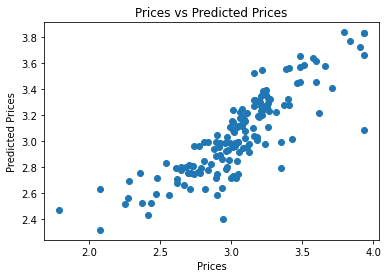

In [25]:
#visualising difference between actual prices and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title("Prices vs Predicted Prices")
plt.show()

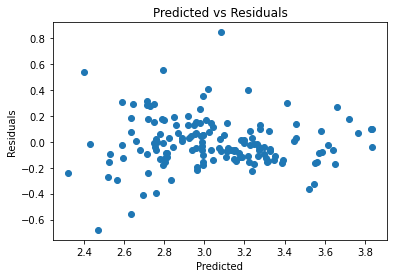

In [26]:
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

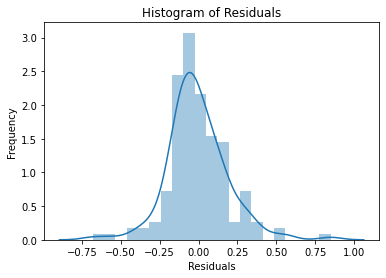

In [27]:
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [28]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(estimator=lregression, X=x_train, y=y_train, cv=5)

print(cv_scores)
print("Accuracy of Linear Regression:{}".format(cv_scores.mean()))

[0.72773181 0.76374706 0.77258077 0.73657405 0.57895969]
Accuracy of Linear Regression:0.715918674885733


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(random_state=42)
decision_tree.fit(x_train,y_train)
#predicted value of Decision Tree
y_pred1=decision_tree.predict(x_test)
y_pred1

array([3.16124671, 3.44998755, 2.93385687, 3.25037449, 2.76631911,
       3.10009229, 2.9601051 , 2.66025954, 3.10906096, 3.16124671,
       2.98568194, 3.33576958, 2.44234704, 3.07269331, 3.08190997,
       3.16968558, 3.06805294, 2.10413415, 3.93182563, 2.93385687,
       3.17805383, 3.18221184, 2.70136121, 3.07269331, 2.99573227,
       2.84490938, 3.13549422, 2.66722821, 3.02042489, 3.04452244,
       2.8678989 , 3.18221184, 3.4657359 , 2.77258872, 2.66025954,
       2.8094027 , 3.49650756, 2.99573227, 3.06339092, 3.22286785,
       3.20680324, 3.25809654, 3.93182563, 2.98061864, 3.13549422,
       2.84490938, 2.8678989 , 3.22286785, 3.00071982, 3.33576958,
       3.17387846, 3.6454499 , 2.76000994, 3.34990409, 3.78645978,
       3.23867845, 2.87356464, 3.47196645, 2.91777073, 3.18221184,
       3.25809654, 3.52341501, 3.42751469, 2.95491028, 3.33576958,
       2.90690106, 2.93385687, 3.14415228, 3.31781577, 3.18635263,
       3.01062089, 3.25809654, 2.54944517, 3.19867312, 3.16124

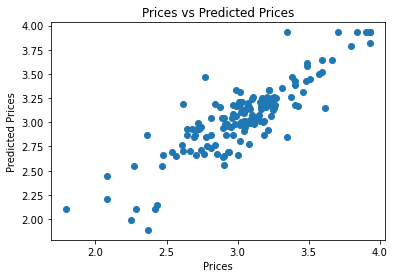

In [30]:
#visualising difference between actual prices and predicted values
plt.scatter(y_test,y_pred1)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title("Prices vs Predicted Prices")
plt.show()

In [31]:
cv_scores1=cross_val_score(decision_tree,X=x_train,y=y_train,cv=5)

print(cv_scores1)
print("Accuracy of Decision Tree Regressor:{}".format(cv_scores1.mean()))

[0.77941724 0.71729387 0.77227595 0.73365758 0.55323583]
Accuracy of Decision Tree Regressor:0.711176095692027


## Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

random_forest=RandomForestRegressor(n_estimators=10,random_state=42)
random_forest.fit(x_train,y_train)
#predicted values of Random Forest
y_pred2=random_forest.predict(x_test)
y_pred2

array([3.19914964, 3.44418641, 2.83954044, 3.20510387, 2.77187018,
       3.08385438, 2.96974456, 2.6515889 , 3.10662344, 3.05279708,
       2.96164777, 3.0449739 , 2.1617288 , 3.1329012 , 2.96792966,
       3.23275471, 2.95525426, 2.18270162, 3.83487511, 2.80901836,
       3.20202158, 3.24565023, 2.73703144, 3.20741675, 2.75004306,
       2.81956882, 3.14820772, 2.74541751, 3.04166866, 3.06877702,
       3.02253445, 3.19430874, 3.37538757, 3.02600942, 2.65574191,
       2.88520729, 3.49025142, 2.98804758, 3.09900689, 3.20233796,
       2.96478035, 3.46900496, 3.82670731, 3.08281277, 3.18299566,
       2.7981957 , 2.83947736, 3.21913416, 2.8599859 , 3.34748841,
       3.11702099, 3.59633269, 3.00490886, 3.30786052, 3.89458466,
       3.11899906, 2.88953638, 3.593186  , 3.14379222, 3.09511103,
       3.25829827, 3.55890919, 3.36591329, 3.10522671, 3.2861388 ,
       2.88275807, 2.84672516, 3.20978934, 3.35007444, 2.98871096,
       3.06477163, 3.34875646, 2.58451116, 3.09526734, 3.12645

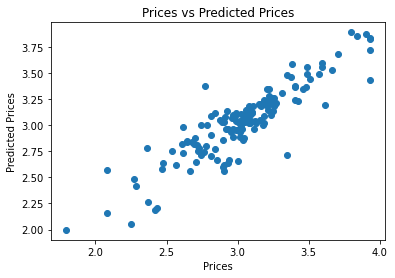

In [33]:
#visualising difference between actual prices and predicted values
plt.scatter(y_test,y_pred2)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title("Prices vs Predicted Prices")
plt.show()

In [34]:
cv_scores2=cross_val_score(random_forest,X=x_train,y=y_train,cv=5)

print(cv_scores2)
print("Accuracy of Random Forest Regression:{}".format(cv_scores2.mean()))

[0.81644927 0.80948895 0.85951096 0.84126046 0.71742888]
Accuracy of Random Forest Regression:0.8088277032919201


## XGBoost Regression

In [35]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
#predicted values of xgbregressor
y_pred3=xgb.predict(x_test)
y_pred3

array([3.232002 , 3.4950814, 2.8598254, 3.1957064, 2.7266378, 3.1167238,
       3.0187926, 2.748846 , 3.0938919, 3.118231 , 3.0358264, 3.091058 ,
       1.999179 , 3.1510706, 2.9350066, 3.0190625, 3.074222 , 2.2963943,
       3.8775496, 2.8369431, 3.2535884, 3.286976 , 2.6081672, 3.030909 ,
       2.8701005, 2.7545066, 3.196144 , 2.7907703, 3.1620886, 3.0579138,
       3.0591486, 3.1710708, 3.2677593, 2.9503329, 2.6766243, 2.8315916,
       3.5614278, 3.0302963, 3.0907135, 3.271085 , 2.8624866, 3.434681 ,
       3.8635604, 3.05053  , 3.1256316, 2.685338 , 2.8319643, 3.2158074,
       2.9187522, 3.2189217, 3.1402316, 3.6466753, 2.9684832, 3.3300507,
       3.842202 , 3.0899544, 2.8511348, 3.4890306, 3.1871884, 2.9958785,
       3.1974885, 3.5824003, 3.4125392, 2.8955698, 3.241884 , 2.8764577,
       2.7380095, 3.2061684, 3.3517213, 2.848827 , 3.0486336, 3.291609 ,
       2.5655262, 3.0593722, 3.0968113, 1.861298 , 3.0317414, 3.9056857,
       2.6222138, 2.4415865, 3.1221502, 2.6289303, 

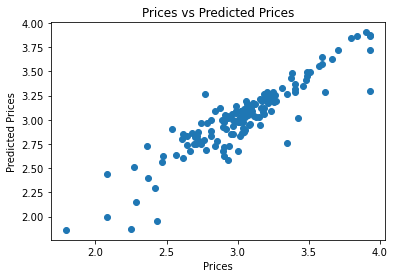

In [36]:
#visualising difference between actual prices and predicted values
plt.scatter(y_test,y_pred3)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title("Prices vs Predicted Prices")
plt.show()

In [37]:
cv_scores3=cross_val_score(xgb,X=x_train,y=y_train,cv=5)

print(cv_scores3)
print("Accuracy of XGBoost Regression:{}".format(cv_scores3.mean()))

[0.87965417 0.83923507 0.80462394 0.86183814 0.74656413]
Accuracy of XGBoost Regression:0.8263830902596115
